In [130]:
import numpy as np
import cv2
from imutils import contours
import matplotlib.pyplot as plt
image=cv2.imread(r'C:\Users\RACHIT\Desktop\Wallpapers\omr.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)
_,cnts,_ = cv2.findContours(edged, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)
# ensure that at least one contour was found
for c in cnts:
    peri=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c, 0.02 * peri, True)
    
    if len(approx) == 4:
        docCnt = approx
        break
x,y,w,h=cv2.boundingRect(docCnt)
pts1=np.float32([[x,y],[x+w,y],[x,y+h],[x+w,y+h]])
pts2=np.float32([[0,0],[400,0],[0,400],[400,400]])
per=cv2.getPerspectiveTransform(pts1,pts2)
mask=cv2.warpPerspective(image,per,(400,400))
lk=mask
cv2.drawContours(image,[docCnt],-1,(255,0,0),4)
graymask=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(graymask, 0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
_,cnts,_ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
questionCnts = []
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    #print(w,h,ar)
    if(w >= 20 and h >= 20 and ar>0.9 and ar<=1.3):
        #print(w,h,ar)
        questionCnts.append(c)
questionCnts = contours.sort_contours(questionCnts,method="top-to-bottom")[0]
ANSWER_KEY = {0: 1, 1: 4, 2: 0, 3: 3, 4: 1}
correct = 0
li=[]
for (q, i) in enumerate(np.arange(0, len(questionCnts), 5)):
    cnts = contours.sort_contours(questionCnts[i:i + 5])[0]
    bubbled = None
    l=[]
    for (j, c) in enumerate(cnts):
        mask = np.zeros(thresh.shape, dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
        #cv2.imshow('nothing',mask)
        #cv2.waitKey()
        mask = cv2.bitwise_and(thresh, thresh, mask=mask)
        total = cv2.countNonZero(mask)
        #print(total)
        l.append(total)
    if(ANSWER_KEY[q]==l.index(max(l))):
        print(q+1,'th row correct')
        cv2.drawContours(lk,[cnts[l.index(max(l))]],-1,(0,255,0),3)
        correct=correct+1
    else:
        print(q+1,'th row wrong') 
        cv2.drawContours(lk,[cnts[l.index(max(l))]],-1,(0,0,255),3)
    li.append(5*q+l.index(max(l)))
    cv2.imshow('answer',lk)
    cv2.waitKey()
print(li)
print('Total Score is ',(correct/5)*100)

1 th row correct
2 th row correct
3 th row correct
4 th row wrong
5 th row correct
[1, 9, 10, 17, 21]
Total Score is  80.0


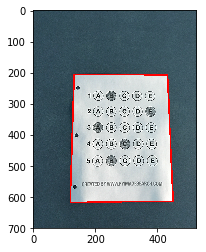

In [128]:
plt.imshow(image)# This is the original image